<p style="font-size:32px;text-align:center"> <b>Social network Graph Link Prediction - Facebook Challenge</b> </p>

In [1]:
#Importing Libraries
# please do go through this python notebook: 
import warnings
warnings.filterwarnings("ignore")

import csv
import pandas as pd#pandas to create small dataframes 
import datetime #Convert to unix time
import time #Convert to unix time
# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays
# matplotlib: used to plot graphs
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  
from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os
# to install xgboost: pip3 install xgboost
import xgboost as xgb

import warnings
import networkx as nx
import pdb
import pickle
from pandas import HDFStore,DataFrame
from pandas import read_hdf
from scipy.sparse.linalg import svds, eigs
import gc
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [2]:
#reading
from pandas import read_hdf
df_final_train = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'train_df',mode='r')
df_final_test = read_hdf('data/fea_sample/storage_sample_stage4.h5', 'test_df',mode='r')

In [3]:
print(df_final_train.columns)
print(df_final_train.shape)
print(df_final_test.shape)

Index(['source_node', 'destination_node', 'indicator_link',
       'jaccard_followers', 'jaccard_followees', 'cosine_followers',
       'cosine_followees', 'preferential_attach', 'num_followers_s',
       'num_followers_d', 'num_followees_s', 'num_followees_d',
       'inter_followers', 'inter_followees', 'adar_index', 'follows_back',
       'same_comp', 'shortest_path', 'weight_in', 'weight_out', 'weight_f1',
       'weight_f2', 'weight_f3', 'weight_f4', 'page_rank_s', 'page_rank_d',
       'katz_s', 'katz_d', 'hubs_s', 'hubs_d', 'authorities_s',
       'authorities_d', 'svd_u_s_1', 'svd_u_s_2', 'svd_u_s_3', 'svd_u_s_4',
       'svd_u_s_5', 'svd_u_s_6', 'svd_u_d_1', 'svd_u_d_2', 'svd_u_d_3',
       'svd_u_d_4', 'svd_u_d_5', 'svd_u_d_6', 'svd_v_s_1', 'svd_v_s_2',
       'svd_v_s_3', 'svd_v_s_4', 'svd_v_s_5', 'svd_v_s_6', 'svd_v_d_1',
       'svd_v_d_2', 'svd_v_d_3', 'svd_v_d_4', 'svd_v_d_5', 'svd_v_d_6',
       'svd_dot_u', 'svd_dot_v'],
      dtype='object')
(100002, 58)
(50002, 58)


In [4]:
y_train = df_final_train.indicator_link
y_test = df_final_test.indicator_link
print(y_train.shape)
print(y_test.shape)

(100002,)
(50002,)


In [5]:
df_final_train.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)
df_final_test.drop(['source_node', 'destination_node','indicator_link'],axis=1,inplace=True)

Estimators =  10 Train Score 0.920052675176823 test Score 0.9161859518154055
Estimators =  50 Train Score 0.9187049075309017 test Score 0.9078691572986223
Estimators =  100 Train Score 0.9199726474146547 test Score 0.9147329223907601
Estimators =  250 Train Score 0.9214809515292434 test Score 0.9165351680026932
Estimators =  450 Train Score 0.9217100559364091 test Score 0.9135469175120747


Text(0.5,1,'Estimators vs score at depth of 5')

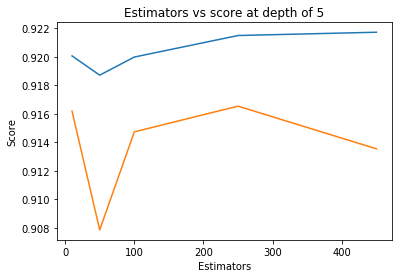

In [6]:
estimators = [10,50,100,250,450]
train_scores = []
test_scores = []
for i in estimators:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=i, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('Estimators = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(estimators,train_scores,label='Train Score')
plt.plot(estimators,test_scores,label='Test Score')
plt.xlabel('Estimators')
plt.ylabel('Score')
plt.title('Estimators vs score at depth of 5')

depth =  3 Train Score 0.8930755386218437 test Score 0.878628920933591
depth =  9 Train Score 0.9573701652909574 test Score 0.9229564075963838
depth =  11 Train Score 0.9609426364234056 test Score 0.9237024331363954
depth =  15 Train Score 0.9640284817269611 test Score 0.9251101321585903
depth =  20 Train Score 0.9635736432516786 test Score 0.9247526011315716
depth =  35 Train Score 0.9636753671980046 test Score 0.9251954324936974
depth =  50 Train Score 0.9636753671980046 test Score 0.9251954324936974
depth =  70 Train Score 0.9636753671980046 test Score 0.9251954324936974
depth =  130 Train Score 0.9636753671980046 test Score 0.9251954324936974


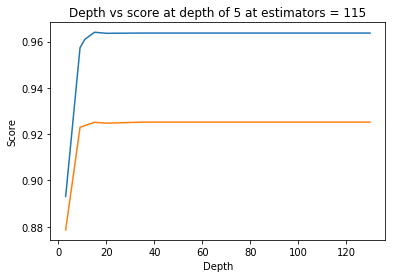

In [7]:
depths = [3,9,11,15,20,35,50,70,130]
train_scores = []
test_scores = []
for i in depths:
    clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=i, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=52, min_samples_split=120,
            min_weight_fraction_leaf=0.0, n_estimators=115, n_jobs=-1,random_state=25,verbose=0,warm_start=False)
    clf.fit(df_final_train,y_train)
    train_sc = f1_score(y_train,clf.predict(df_final_train))
    test_sc = f1_score(y_test,clf.predict(df_final_test))
    test_scores.append(test_sc)
    train_scores.append(train_sc)
    print('depth = ',i,'Train Score',train_sc,'test Score',test_sc)
plt.plot(depths,train_scores,label='Train Score')
plt.plot(depths,test_scores,label='Test Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Depth vs score at depth of 5 at estimators = 115')
plt.show()

In [8]:
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

param_dist = {"n_estimators":sp_randint(105,125),
              "max_depth": sp_randint(10,15),
              "min_samples_split": sp_randint(110,190),
              "min_samples_leaf": sp_randint(25,65)}

clf = RandomForestClassifier(random_state=25,n_jobs=-1)

rf_random = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=5,cv=10,scoring='f1',random_state=25)

rf_random.fit(df_final_train,y_train)
print('mean test scores',rf_random.cv_results_['mean_test_score'])
print('mean train scores',rf_random.cv_results_['mean_train_score'])

mean test scores [0.96161464 0.96124561 0.95955471 0.96170826 0.96321299]
mean train scores [0.96277043 0.96231225 0.96024121 0.96254122 0.96446634]


In [9]:
print(rf_random.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)


In [10]:
clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=14, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=28, min_samples_split=111,
            min_weight_fraction_leaf=0.0, n_estimators=121, n_jobs=-1,
            oob_score=False, random_state=25, verbose=0, warm_start=False)

In [11]:
clf.fit(df_final_train,y_train)
y_train_pred = clf.predict(df_final_train)
y_test_pred = clf.predict(df_final_test)

In [12]:
from sklearn.metrics import f1_score
print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9640219888414835
Test f1 score 0.9245718398712874


In [13]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    plt.figure(figsize=(20,4))
    
    labels = [0,1]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Train confusion_matrix


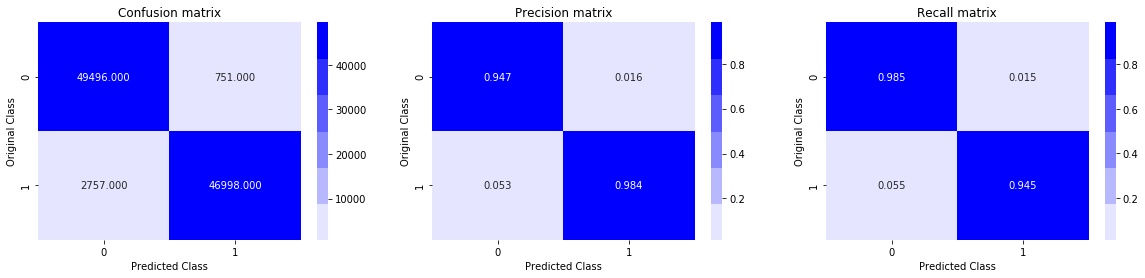

Test confusion_matrix


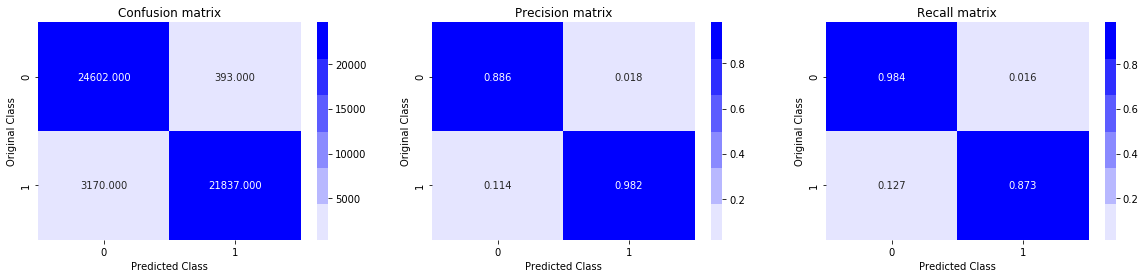

In [14]:
print('Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

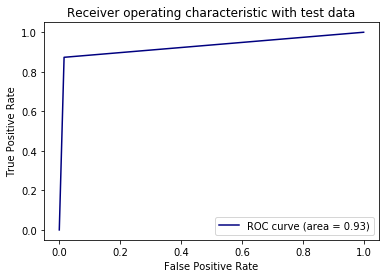

In [15]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

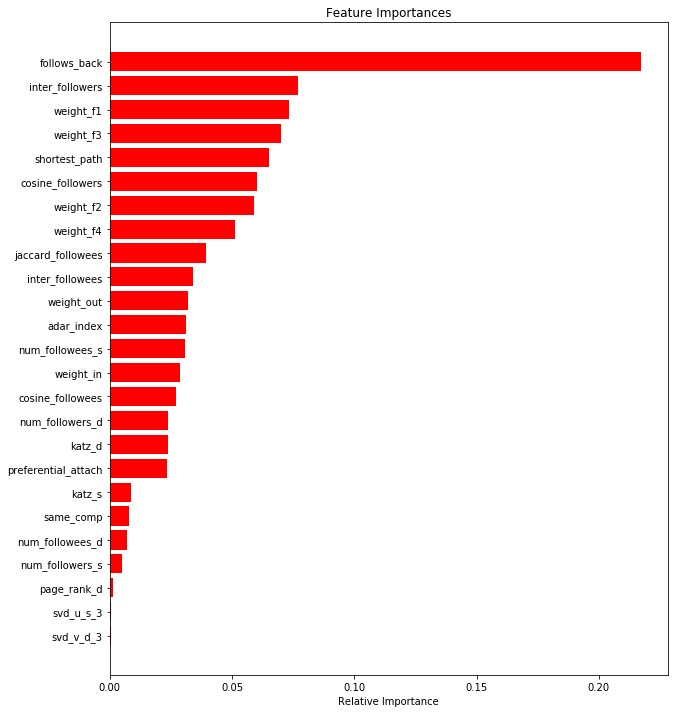

In [16]:
features = df_final_train.columns
importances = clf.feature_importances_
indices = (np.argsort(importances))[-25:]
plt.figure(figsize=(10,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<h2>XG Boost Classifier</h2>

In [50]:
import xgboost as xgb
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings("ignore")
#computing the best depth 
train_f1 = []
test_f1 = []
max_depth = [1, 5, 10, 50, 100, 500,700,800,900 ,1000]
n_models =[10,20,30,40,50,60,70,80,90,100]

for i in max_depth:
    xgb_model = xgb.XGBClassifier(max_depth=i,n_jobs=2)
    xgb_model.fit(df_final_train, y_train)
    y_train_pred =  xgb_model.predict(df_final_train)
    y_test_pred =  xgb_model.predict(df_final_test)
    train_f1_score=f1_score(y_train,y_train_pred)
    train_f1.append(train_f1_score)
    test_f1_score=f1_score(y_test, y_test_pred)
    test_f1.append(test_f1_score)
    print("Best_depth = ",i ,"\t","test_f1_score\t:",test_f1_score, "\t","train_f1_score\t:",train_f1_score)

Best_depth =  1 	 test_f1_score	: 0.9159747733208757 	 train_f1_score	: 0.9269820513361314
Best_depth =  5 	 test_f1_score	: 0.9277251687969765 	 train_f1_score	: 0.9764969450101832
Best_depth =  10 	 test_f1_score	: 0.9263216022768304 	 train_f1_score	: 0.9907598366290591
Best_depth =  50 	 test_f1_score	: 0.9299845538604771 	 train_f1_score	: 0.9999799019213763
Best_depth =  100 	 test_f1_score	: 0.9299845538604771 	 train_f1_score	: 0.9999799019213763
Best_depth =  500 	 test_f1_score	: 0.9299845538604771 	 train_f1_score	: 0.9999799019213763
Best_depth =  700 	 test_f1_score	: 0.9299845538604771 	 train_f1_score	: 0.9999799019213763
Best_depth =  800 	 test_f1_score	: 0.9299845538604771 	 train_f1_score	: 0.9999799019213763
Best_depth =  900 	 test_f1_score	: 0.9299845538604771 	 train_f1_score	: 0.9999799019213763
Best_depth =  1000 	 test_f1_score	: 0.9299845538604771 	 train_f1_score	: 0.9999799019213763


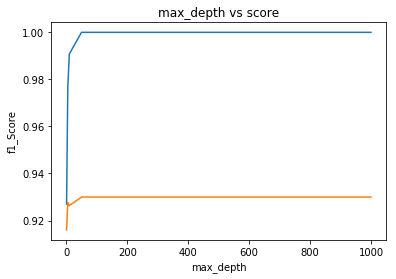

In [51]:
plt.plot(max_depth,train_f1,label='Train Score')
plt.plot(max_depth,test_f1,label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('f1_Score')
plt.title('max_depth vs score')
plt.show()

In [52]:
#computing the best n-estimators 
train_f1_2=[]
test_f1_2=[]

for j in n_models:
    xgb_model = xgb.XGBClassifier(max_depth=10,n_estimators=j,n_jobs=2)
    xgb_model.fit(df_final_train, y_train)
    y_train_pred =  xgb_model.predict(df_final_train)
    y_test_pred =  xgb_model.predict(df_final_test)
    train_f1_score=f1_score(y_train,y_train_pred)
    train_f1_2.append(train_f1_score)
    test_f1_score=f1_score(y_test, y_test_pred)
    test_f1_2.append(test_f1_score)
    print("Best_estimator = ",j ,"\t","test_f1_score\t:",test_f1_score, "\t","train_f1_score\t:",train_f1_score)


Best_estimator =  10 	 test_f1_score	: 0.9342742784916789 	 train_f1_score	: 0.9779167600382994
Best_estimator =  20 	 test_f1_score	: 0.9331417462598259 	 train_f1_score	: 0.9793631715118055
Best_estimator =  30 	 test_f1_score	: 0.9326037353164878 	 train_f1_score	: 0.9811662293814958
Best_estimator =  40 	 test_f1_score	: 0.930656625486546 	 train_f1_score	: 0.9819471112330214
Best_estimator =  50 	 test_f1_score	: 0.9269959878574309 	 train_f1_score	: 0.9824735987002436
Best_estimator =  60 	 test_f1_score	: 0.9266345316713737 	 train_f1_score	: 0.9834867599744231
Best_estimator =  70 	 test_f1_score	: 0.9277532665874767 	 train_f1_score	: 0.9846628256106469
Best_estimator =  80 	 test_f1_score	: 0.9279216235129462 	 train_f1_score	: 0.9866361361310652
Best_estimator =  90 	 test_f1_score	: 0.9276604774535809 	 train_f1_score	: 0.9886241726210959
Best_estimator =  100 	 test_f1_score	: 0.9263216022768304 	 train_f1_score	: 0.9907598366290591


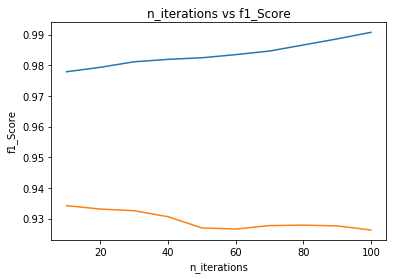

In [53]:
plt.plot(n_models,train_f1_2,label='Train Score')
plt.plot(n_models,test_f1_2,label='Test Score')
plt.xlabel('n_iterations')
plt.ylabel('f1_Score')
plt.title('n_iterations vs f1_Score')
plt.show()

In [62]:
#computing the model with best hyper parameters 
xg_clf = xgb.XGBClassifier(max_depth=10,n_estimators=10)
xg_clf.fit(df_final_train, y_train)

print('Train f1 score',f1_score(y_train,y_train_pred))
print('Test f1 score',f1_score(y_test,y_test_pred))

Train f1 score 0.9907598366290591
Test f1 score 0.9263216022768304


Xg boost Train confusion_matrix


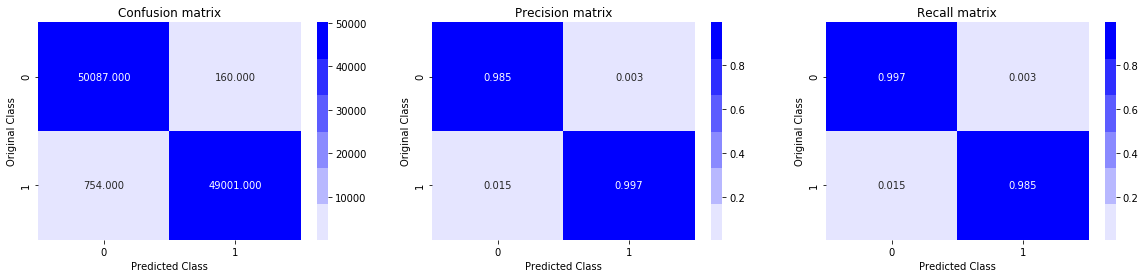

Xg boost Test confusion_matrix


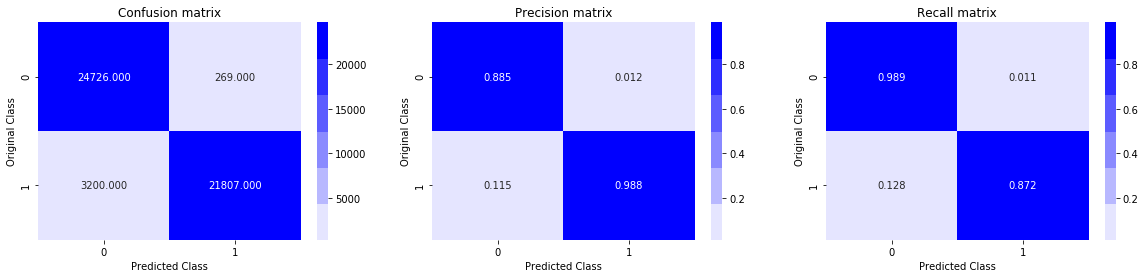

In [59]:
#confusion recall and precision matrix 
print('Xg boost Train confusion_matrix')
plot_confusion_matrix(y_train,y_train_pred)
print('Xg boost Test confusion_matrix')
plot_confusion_matrix(y_test,y_test_pred)

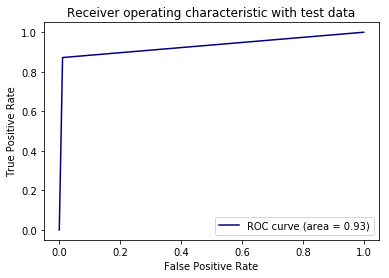

In [60]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,ths = roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='navy',label='ROC curve (area = %0.2f)' % auc_sc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic with test data')
plt.legend()
plt.show()

In [4]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = [ "Model", "best_hyperparameter", "Train_F1-score","Test_F1-score"]

x.add_row(["RandomForest",121,0.96,0.924])
x.add_row(["XG-Boost",10,0.99,0.926])
print(x)

+--------------+---------------------+----------------+---------------+
|    Model     | best_hyperparameter | Train_F1-score | Test_F1-score |
+--------------+---------------------+----------------+---------------+
| RandomForest |         121         |      0.96      |     0.924     |
|   XG-Boost   |          10         |      0.99      |     0.926     |
+--------------+---------------------+----------------+---------------+


<h2> Observations</h2>

<ol>
    <li>We deal  Social network Graph Link Prediction - Facebook Challenge Dataset </li>
    <li>Understanding  the data and its requirement's, and metric used is f1_score because we need precison and recall both are important </li>
    <li>In this data we performing about link predictions for that wee used graph theory concept</li>
    <li>we made the features using graph theory and link predictions concept </li>
    <li>Analyze and visualize (EDA) the data Before applying the feature Engineering </li>
    <li>Based on some common graph theory and link prediction made some new fetures for perforing classification problem</li>
    <li>Used networkx library for convert our data to graph data </li>
    <li>Applied Random Forest classifier and XgBoost classifier </li>
    <li>We got slightly similar results in RandomForest and XgBoost compare RandomForest XGBoost will give slightly better results </li>
    <li>Overall Final statement is Models that Randomforest Classifier and XgBoost classifier performs nearly similar both models gives good results</li>
    
</ol>